# Using Convolutional Neural Networks (VGG16)

By: Aris Budi Wibowo

## Basic Setup

First, we need to install Keras.

In [1]:
!pip2 install keras==1.2.2

    100% |################################| 184kB 585kB/s ta 0:00:01
  Running setup.py bdist_wheel for keras ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/f6/c5/63/97d96b41bf822858027c70b04448c19deaccf1cf518148fa82
Successfully built keras


Now, we configure Keras to use Theano as default configuration. We can change it to Tensorflow if we want.

In [2]:
!mkdir -p ~/.keras
!echo '{"epsilon":1e-07,"floatx":"float32","backend":"theano","img_dim_ordering":"th"}' > ~/.keras/keras.json

Now, we are done setup Keras. Next, we restart the kernel to make Keras use the configuration that we want.

Because we want to show plots too, we need to add extra configuration in Jupyter.

In [1]:
%matplotlib inline

Define path of the data.

In [2]:
#path = "/datasets/fast.ai/dogscats/"
#path = "D:/datasets/dogscats/"
path = "D:/datasets/dogscats/sample/"

Next, we import libraries that we will use later.

In [3]:
from __future__ import division,print_function

import os,json
from glob import glob
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
from matplotlib import pyplot as plt

For convenience, we already have some functions that we will use later.

In [4]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: GeForce 930M (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


## Using Pretrained VGG Model

Now, for simplification, we just need 7 lines of code to classify cats and dogs photos. For using VGG, we already have pretrained model. So now we just load the model.

In [5]:
batch_size = 16

In [7]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [8]:
vgg = Vgg16()

In [9]:
batches = vgg.get_batches(path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches,val_batches,nb_epoch=10)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Epoch 1/10
16/16 [==============================] - 3s - loss: 1.3591 - acc: 0.5625 - val_loss: 0.9202 - val_acc: 0.5000
Epoch 2/10
16/16 [==============================] - 2s - loss: 0.4780 - acc: 0.8125 - val_loss: 0.5830 - val_acc: 0.6250
Epoch 3/10
16/16 [==============================] - 2s - loss: 0.3025 - acc: 0.8125 - val_loss: 0.4653 - val_acc: 0.6250
Epoch 4/10
16/16 [==============================] - 2s - loss: 0.1158 - acc: 1.0000 - val_loss: 0.3894 - val_acc: 0.7500
Epoch 5/10
16/16 [==============================] - 2s - loss: 0.0614 - acc: 0.9375 - val_loss: 0.3377 - val_acc: 0.8750
Epoch 6/10
16/16 [==============================] - 2s - loss: 0.2752 - acc: 0.8750 - val_loss: 0.3061 - val_acc: 0.8750
Epoch 7/10
16/16 [==============================] - 2s - loss: 0.0223 - acc: 1.0000 - val_loss: 0.3000 - val_acc: 0.8750
Epoch 8/10
16/16 [==============================] - 2s - loss: 0.0460 - ac

If you want to understand what is batch and epoch, you can read [here](https://stats.stackexchange.com/a/164875).

Not that bad in performance since we have limited data. :) If you curious, you can use all dogs vs cats data (approx. 25000 train data vs 15000 test data) and get 97% in accuracy with only 1 epoch.

## Breakdown the Process, Step by Step

### For Basic Image Recognition

We will try to use VGG16 to recognise categories from ImageNet from each image. Means, we just want to know each type of breed, not necessesarily guess dog or cat (since the model are not capable to do that because ImageNet don't have 'cat' or 'dog' category). First, we load the object.

In [10]:
vgg = Vgg16()

Now, we grab batches from our training data.

In [10]:
path = "D:/datasets/dogscats/"

In [12]:
batches = vgg.get_batches(path+'train',batch_size=4)

Found 23000 images belonging to 2 classes.


In [13]:
imgs, labels = next(batches)

Now, we want to know images that we grabbed before.

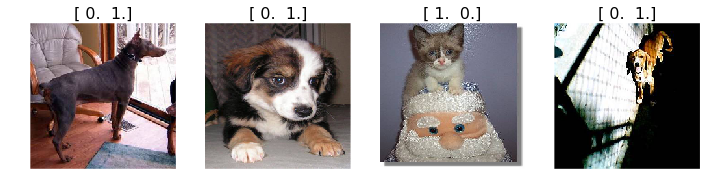

In [14]:
plots(imgs, titles=labels)

Let's predict the species of each image.

In [15]:
vgg.predict(imgs,True)

(array([ 0.4813,  0.1488,  0.2255,  0.2532], dtype=float32),
 array([237, 239, 284, 166], dtype=int64),
 [u'miniature_pinscher',
  u'Bernese_mountain_dog',
  u'Siamese_cat',
  u'Walker_hound'])

The category indexes are based on VGG model from ImageNet. If we want to know the first four of that categories:

In [16]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

### Use VGG16 to finetune Cats vs Dogs Model

Now, we will try to specifically using VGG16 for classify dogs and cats images. Because by default VGG16 was trained using ImageNet, we will use a technique called "finetuning". Finetuning is a process that use a pretrained model for second similiar task. [Source](http://wiki.fast.ai/index.php/Fine_tuning)

First, we setup batches. A batch is a subset of the training data. We need this to speed up training time and to control gpu memory usage.

In [12]:
batch_size=16

In [13]:
batches = vgg.get_batches(path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid',batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Now, we call *finetune()* so the model can specifically train based on our 'cats vs dogs' data. 

In [14]:
vgg.finetune(batches)

Finally, we fit the model with our training data. We will predict data in batches either cats or dogs.

In [15]:
vgg.fit(batches,val_batches,nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 2588s - loss: 0.1555 - acc: 0.9687 - val_loss: 0.1239 - val_acc: 0.9810


Now we learned basic steps on how to use VGG16 for image recognition task. (ex: disease, paintings, etc.

Next, we will try to understand what's inside VGG16.

## Create VGG16 model from scratch with Keras (TODO: Complete this section)

### Model Setup

First, we import all the libraries that we need.

In [5]:
from numpy.random import random, permutation
from scipy import ndimage, misc
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Now, import ImageNet category ids and descriptions. It's not necessarily important for our model, but we will use this for plotting purpose.

In [7]:
FILES_PATH = 'http://files.fast.ai/models'; CLASS_FILE= 'imagenet_class_index.json'
fpath=get_file(CLASS_FILE,FILES_PATH+CLASS_FILE,cache_subdir='models')
with open(fpath) as f: class_dict=json.load(f)
# Convert dictionaries to an array
classes= [class_dict[str(i)][1] for i in range(len(class_dict))]

To check if we succeed download the file, we can check the array.


In [9]:
classes[:5]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']

### Model Creation

Now, we start with basic stuffs of the VGG architecture.

VGG has just one type of convolutional block, and one type of fully connected ('dense') block. For the convolutional block:

In [16]:
def ConvBlock(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters,3,3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

For the fully connected block:

In [17]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

In 2014, the creators of VGG substracted the average of each of the three (R,G,B) channel first, so that the data for each channel had a mean of zero.The problem is, while their original software expected the channels to be in B,G,R order,  Python uses R,G,B. Now, we need to preprocess our data to make these two changes, so that it is compatible with the VGG model.

In [18]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68,116.779,103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x=x - vgg_mean      # substract mean
    return x[:, ::-1]   # reverse axis bgr -> rgb

Now, it's time to build the VGG model architecture!

In [19]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess,input_shape=(3,224,224)))
    
    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)
    
    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000,activation='softmax'))
    return model

We'll know what these blocks do later. For now:

- Convolution layers are for finding patterns in images.
- Dense (fully connected) layers are for combining patterns across an image.

Now that we've defined the architecture, we can create the model like any python object.

In [20]:
model = VGG_16()

C:\Anaconda2\lib\site-packages\keras\layers\core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


We also need the weights that the VGG creators trained. The weights are the part of the model that is learnt from the data, whereas the architecture is pre-defined based on the nature of the problem.

It's preferred to download pre-trained weights than train the model by ourselves, since it's really resources demanding (time, size of dataset, etc.)

In [23]:
#fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.hdf',cache_subdir='models')
#model.load_weights(fpath)
model.load_weights('vgg16.hdf')

### Getting ImageNet Predictions

The setup for our model is done! We are now ready to predict cats and dogs images. Again, we will grab a batch of images and call *predict()* on them.

In [24]:
batch_size=4

Keras provides functionality to create batches of data from directories containing images; all we have to do is to define the size to resize the images to, what type of labels to create, whether to randomly shuffle the images, and how many images to include in each batch. We use this little wrapper to define some helpful defaults appropriate for ImageNet data.

In [27]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True,
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224),
                       class_mode=class_mode, shuffle=shuffle,batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


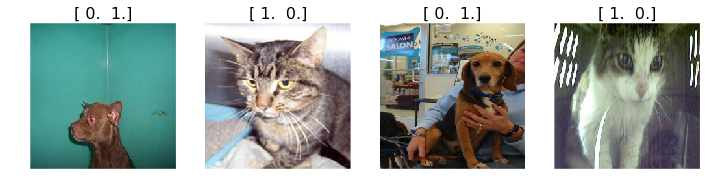

In [28]:
batches     = get_batches('train',batch_size=batch_size)
val_batches = get_batches('valid',batch_size=batch_size)
imgs,labels  = next(batches)

plots(imgs, titles=labels)

In [31]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)
    
    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx =idxs[i]
        print('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [33]:
pred_batch(imgs)

Shape: (4L, 1000L)
First 5 classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']
First 5 probabilities: [  1.3904e-06   4.8316e-06   4.1257e-06   5.3251e-06   1.9815e-05]

Predictions prob/class: 
  0.4229/Chihuahua
  0.6869/tabby
  0.3414/miniature_pinscher
  0.0665/titi
